In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from PIL import Image

<p style="font-size: 20px; color: seagreen; text-align: center"> Analyzing with pandas 

Python's pandas library provides a way to read and analyse data. In this document I will show some moves on the LEGO dataset. The set is divided into 8 parts - sets, inventory sets, parts, inventory parts, inventories, part categories, themes and colors. If you are familiar with my work, you know I love colors :)

The dataset includes a dataset schema, so let's start with it:

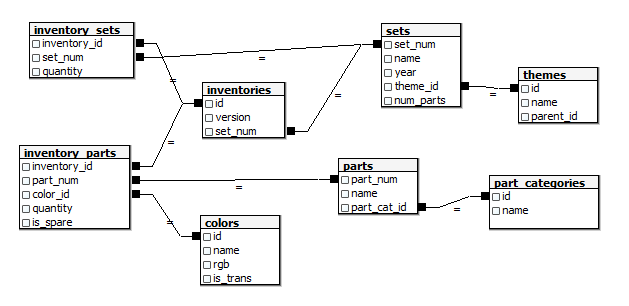

In [4]:
Image.open("dataset_schema.png")

Confusing, huh? Let's zoom more in:

In [5]:
df_inventory_sets = pd.read_csv("inventory_sets.csv")      # number dataframe

The inventory sets are numerical data, we have numbers to work with. First, I look closer at the dataset, then I make a variable name and wrap the data in it. The first variable name is "df_inventory_sets" (df is for dataframe). I will do the same for all eight parts.

In [6]:
df_inventories = pd.read_csv("inventories.csv")       # number dataframe

In [7]:
df_sets = pd.read_csv("sets.csv")      # text and number dataframe

In [8]:
df_themes = pd.read_csv("themes.csv")           # text dataframe

In [9]:
df_inventory_parts = pd.read_csv("inventory_parts.csv")         # number dataframe

In [10]:
df_colors = pd.read_csv("colors.csv")      # text dataframe

In [11]:
df_parts = pd.read_csv("parts.csv")        # text dataframe

In [12]:
df_part_categories = pd.read_csv("part_categories.csv")    # text dataframe

Now we know what a single dataset part looks like. We have numbers, we have text. The colors have a nice shape to start with:

In [13]:
df_colors.shape      # small and compact

(135, 4)

In [14]:
pd.set_option("display.max_rows", None)     # read all the colors
df_colors

id                          name     rgb is_trans
0      -1                       Unknown  0033B2        f
1       0                         Black  05131D        f
2       1                          Blue  0055BF        f
3       2                         Green  237841        f
4       3                Dark Turquoise  008F9B        f
5       4                           Red  C91A09        f
6       5                     Dark Pink  C870A0        f
7       6                         Brown  583927        f
8       7                    Light Gray  9BA19D        f
9       8                     Dark Gray  6D6E5C        f
10      9                    Light Blue  B4D2E3        f
11     10                  Bright Green  4B9F4A        f
12     11               Light Turquoise  55A5AF        f
13     12                        Salmon  F2705E        f
14     13                          Pink  FC97AC        f
15     14                        Yellow  F2CD37        f
16     15                         White  FFFFFF        f
17     17                   Light Green  C2DAB8        f
18     18                  Light Yellow  FBE696        f
19     19                           Tan  E4CD9E        f
20     20                  Light Violet  C9CAE2        f
21     21           Glow In Dark Opaque  D4D5C9        f
22     22                        Purple  81007B        f
23     23              Dark Blue-Violet  2032B0        f
24     25                        Orange  FE8A18        f
25     26                       Magenta  923978        f
26     27                          Lime  BBE90B        f
27     28                      Dark Tan  958A73        f
28     29                   Bright Pink  E4ADC8        f
29     30               Medium Lavender  AC78BA        f
30     31                      Lavender  E1D5ED        f
31     32           Trans-Black IR Lens  635F52        t
32     33               Trans-Dark Blue  0020A0        t
33     34                   Trans-Green  84B68D        t
34     35            Trans-Bright Green  D9E4A7        t
35     36                     Trans-Red  C91A09        t
36     40                   Trans-Black  635F52        t
37     41              Trans-Light Blue  AEEFEC        t
38     42              Trans-Neon Green  F8F184        t
39     43            Trans-Very Lt Blue  C1DFF0        t
40     45               Trans-Dark Pink  DF6695        t
41     46                  Trans-Yellow  F5CD2F        t
42     47                   Trans-Clear  FCFCFC        t
43     52                  Trans-Purple  A5A5CB        t
44     54             Trans-Neon Yellow  DAB000        t
45     57             Trans-Neon Orange  FF800D        t
46     60          Chrome Antique Brass  645A4C        f
47     61                   Chrome Blue  6C96BF        f
48     62                  Chrome Green  3CB371        f
49     63                   Chrome Pink  AA4D8E        f
50     64                  Chrome Black  1B2A34        f
51     68             Very Light Orange  F3CF9B        f
52     69                  Light Purple  CD6298        f
53     70                 Reddish Brown  582A12        f
54     71             Light Bluish Gray  A0A5A9        f
55     72              Dark Bluish Gray  6C6E68        f
56     73                   Medium Blue  5A93DB        f
57     74                  Medium Green  73DCA1        f
58     75          Speckle Black-Copper  000000        f
59     76         Speckle DBGray-Silver  635F61        f
60     77                    Light Pink  FECCCF        f
61     78                   Light Flesh  F6D7B3        f
62     79                   Milky White  FFFFFF        f
63     80               Metallic Silver  A5A9B4        f
64     81                Metallic Green  899B5F        f
65     82                 Metallic Gold  DBAC34        f
66     84             Medium Dark Flesh  CC702A        f
67     85                   Dark Purple  3F3691        f
68     86                    Dark Flesh  7C503A        f
69     89        

Always have clarity about the columns:

In [15]:
df_colors.columns

Index(['id', 'name', 'rgb', 'is_trans'], dtype='object')

You see, we work just with the variable name of the dataset and could find the $rgb$ code if we know the color name or vice versa:

In [16]:
df_colors[(df_colors["name"] == "Glow in Dark White")]

id                name     rgb is_trans
126  1000  Glow in Dark White  D9D9D9        f

In [17]:
df_colors[(df_colors["rgb"] == "D9D9D9")]

id                name     rgb is_trans
126  1000  Glow in Dark White  D9D9D9        f

We could read the whole dataset line by line (if needed) or wrap it in a variable and move through it. Next, we go through the sets.

In [18]:
pd.set_option("display.max_colwidth", None)         # shows whole name in the column
df_sets

set_num  \
0                  00-1   
1                0011-2   
2                0011-3   
3                0012-1   
4                0013-1   
5                0014-1   
6                0015-1   
7                0016-1   
8                  00-2   
9                  00-3   
10                 00-4   
11                005-1   
12                 00-6   
13                 00-7   
14                010-1   
15                010-3   
16                011-1   
17                022-1   
18              03093-1   
19                033-2   
20                044-1   
21                055-2   
22                066-1   
23                080-1   
24                088-1   
25              10000-1   
26              10001-1   
27              10002-1   
28              10003-1   
29              10004-1   
30              10005-1   
31              10006-1   
32              10007-1   
33              10008-1   
34              10009-1   
35                100-1   
36              10010-1   
37              10011-1   
38              10012-1   
39              10013-1   
40              10014-1   
41              10015-1   
42              10016-1   
43              10017-1   
44              10018-1   
45              10019-1   
46                100-2   
47              10020-1   
48              10020-2   
49              10021-1   
50              10022-1   
51              10023-1   
52              10024-1   
53              10025-1   
54              10026-1   
55              10027-1   
56              10029-1   
57              10030-1   
58              10036-1   
59              10037-1   
60              10039-1   
61              10040-1   
62              10041-1   
63              10042-1   
64              10043-1   
65              10044-1   
66              10045-1   
67              10046-1   
68              10047-1   
69              10048-1   
70              10049-1   
71              10050-1   
72              10051-1   
73              10053-1   
74              10054-1   
75              10055-1   
76              10056-1   
77              10057-1   
78              10058-1   
79              10059-1   
80              10060-1   
81              10061-1   
82              10062-1   
83              10063-1   
84              10064-1   
85              10065-1   
86              10066-1   
87              10067-1   
88              10068-1   
89              10069-1   
90              10070-1   
91              10071-1   
92              10072-1   
93              10073-1   
94              10074-1   
95              10075-1   
96              10076-1   
97              10077-1   
98              10078-1   
99              10079-1   
100             10080-1   
101             10081-1   
102             10082-1   
103             10083-1   
104             10090-1   
105             10106-1   
106               101-1   
107             10111-1   
108             10112-1   
109             10113-1   
110             10114-1   
111             10115-1   
112             10116-1   
113             10117-1   
114             10118-1   
115             10121-1   
116             10123-1   
117             10124-1   
118             10127-1   
119             10128-1   
120             10129-1   
121               101-3   
122             10131-1   
123             10132-1   
124             10133-1   
125             10134-1   
126             10143-1   
127             10144-1   
128             10145-1   
129             10146-1   
130             10147-1   
131             10148-1   
132             10149-1   
133             10150-1   
134             10151-1   
135             10152-1   
136             10152-2   
137             10152-3   
138             10153-1   
139             10155-1   
140             10156-1   
141             10157-1   
142             10158-1   
143             10159-1   
144             10159-2   
145             10160-1   
146             10161-1   
147             1016

Making columns visible and clear:

In [19]:
df_sets.columns

Index(['set_num', 'name', 'year', 'theme_id', 'num_parts'], dtype='object')

Oh, let's find out the earliest year and the name of the set then:

In [20]:
df_sets.nsmallest(1, "year")                         # 1 is the number of rows we would like to show

set_num                     name  year  theme_id  num_parts
6935  700.1.1-1  Individual 2 x 4 Bricks  1950       371         10

And which year is the last for these data:

In [21]:
df_sets.nlargest(1, "year")

set_num             name  year  theme_id  num_parts
236  10255-1  Assembly Square  2017       155       4009

We get all the parameters inside a row. I guess, you are interested in the number of parts? Me too :) Again, we could check the LEGO set with the most parts and the one with the least parts. We just change the column names:

In [22]:
df_sets.nlargest(1, "num_parts")

set_num       name  year  theme_id  num_parts
170  10189-1  Taj Mahal  2008       276       5922

The set with the most LEGO parts is the $Taj$ $Mahal$. I've made some outside research and the 2008 Taj is the first edition. There is another LEGO Taj Mahal which was released in 2021 with less parts but as we already know, the last year in our dataset is 2017, so here is LEGO Taj Mahal with massive 5922 parts :)

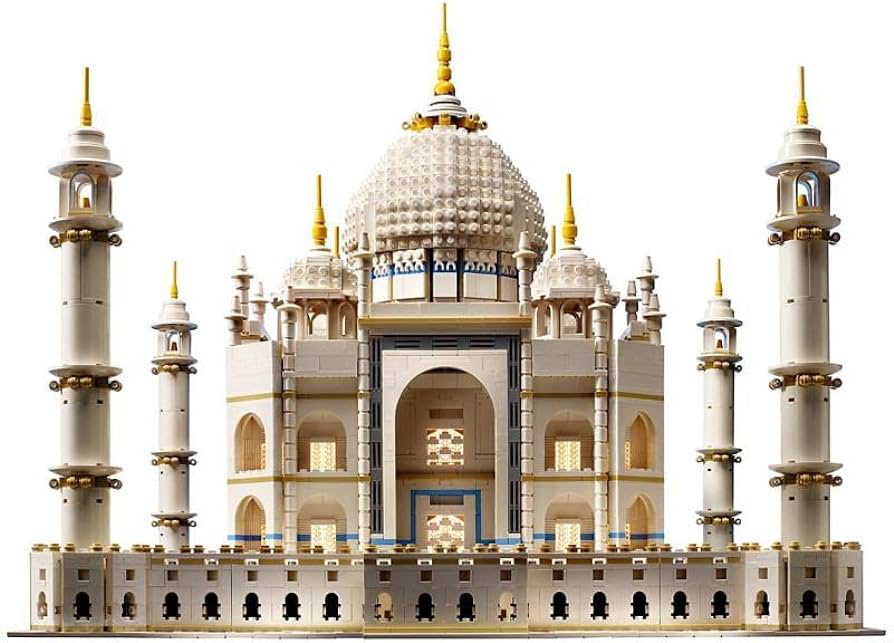

In [23]:
Image.open("lego_taj.JPG")

In [24]:
df_sets.nsmallest(1500, "num_parts") 

set_num  \
1683             240-1   
6545           66392-1   
11645      Vancouver-1   
353            10623-1   
355             1064-1   
613            11995-1   
900               14-3   
1367             200-2   
1394            2027-1   
1598             221-1   
1600             222-1   
1647             226-2   
1672             238-1   
1673             238-2   
1674             238-3   
1675             238-4   
1676             238-5   
1677             238-6   
1678             238-7   
1679             238-8   
1680             238-9   
1681             239-1   
1682             239-2   
1684             240-2   
1686             241-1   
1742             260-1   
1832         2850828-1   
1833         2850829-1   
1834         2851193-1   
1835         2852724-1   
1837         2852726-1   
1849         2855040-1   
1850         2855057-1   
1852         2855127-1   
1854         2856080-1   
1855         2856081-1   
1857         2856128-1   
1858         2856130-1   
1862         2856203-1   
1863         2856217-1   
1864         2856223-1   
1865         2856224-1   
1866         2856225-1   
1869         2856236-1   
1870         2856238-1   
1871         2856453-1   
1914            2981-1   
2941            3911-1   
2943            3913-1   
2945            3914-1   
2946            3915-1   
2947            3916-1   
2948            3917-1   
2949            3918-1   
2953            3922-1   
2954            3923-1   
2955            3924-1   
2956            3925-1   
2957            3926-1   
2974            3948-1   
2977            3961-1   
2979            3983-1   
3727           4180878   
3882         4287744-1   
4084         4499536-1   
4121         4524081-1   
4501         4915-1-b1   
4502         4915-1-b2   
4594         5000143-1   
4600         5000249-1   
4608         5000463-1   
4610         5000642-1   
4612         5000646-1   
4613         5000672-1   
4615         5001096-1   
4625         5001159-1   
4626         5001160-1   
4627         5001252-1   
4628         5001266-1   
4629         5001267-1   
4635         5001357-1   
4636         5001370-1   
4637         5001371-1   
4638         5001377-1   
4639         5001380-1   
4640         5001382-1   
4641         5001383-1   
4642         5001384-1   
4643         5001385-1   
4644         5001386-1   
4645         5001387-1   
4646         5001388-1   
4665         5002201-1   
4668         5002207-1   
4669         5002210-1   
4670         5002212-1   
4671         5002422-1   
4672         5002423-1   
4673         5002424-1   
4674         5002467-1   
4675         5002506-1   
4676         5002518-1   
4678         5002780-1   
4679         5002792-1   
4680         5002793-1   
4683         5002887-1   
4684         5002888-1   
4685         5002914-1   
4686         5002915-1   
4687         5002916-1   
4698         5002946-1   
4700         5003022-1   
4701         5003023-1   
4702         5003024-1   
4703         5003025-1   
4704         5003026-1   
4705         5003027-1   
4712         5003545-1   
4713         5003559-1   
4714         5003561-1   
4715         5003562-1   
4716         5003563-1   
4717         5003564-1   
4718         5003565-1   
4719         5003566-1   
4720         5003568-1   
4721         5003569-1   
4722         5003570-1   
4723         5003574-1   
4724         5003575-1   
4725         5003576-1   
4726         5003578-1   
4727         5003579-1   
4728         5003580-1   
4729         5003582-1   
4730         5003583-1   
4731         5003584-1   
4732         5003586-1   
4733         5004064-1   
4734         5004065-1   
4735         5004066-1   
4736         5004067-1   
4740         5004102-1   
4742         5004115-1   
4743         5004116-1   
4744         5004117-1   
4745         5004118-1   
4746         5004119-1   
4748         5004127-1   
4749         5004128-1   
4750         5004129-1   
4751         5004130-1   
4752         5004131-1   
4754       

Above we see that the first row shows a storage box, so we add more rows one by one, until we get a real LEGO set. My research on the data shows that there are more than 1500 rows just up to 4 parts and most of them not really a LEGO set, they are lots of books, bands, minifigure and other advertisement stuff. So, going through data could mean changing paths here and then...

In [25]:
df_sets[(df_sets["num_parts"] == 0)].count()

set_num      473
name         473
year         473
theme_id     473
num_parts    473
dtype: int64

In [26]:
df_sets[(df_sets["num_parts"] == 1)].count()

set_num      285
name         285
year         285
theme_id     285
num_parts    285
dtype: int64

In [27]:
df_sets[(df_sets["num_parts"] == 3)].count()

set_num      278
name         278
year         278
theme_id     278
num_parts    278
dtype: int64

In [28]:
df_sets[(df_sets["num_parts"] == 5)].count()   # without .count() built-in function, we read

set_num      231
name         231
year         231
theme_id     231
num_parts    231
dtype: int64

We could choose, read and count sets through the number of parts, as shown above, or could extract concrete information:

In [29]:
df_sets[(df_sets["num_parts"] == 2000)]

set_num                      name  year  theme_id  num_parts
2691  3598-1         XXL 2000 Canister  2005        37       2000
3978  4425-1  Better Building More Fun  2004        37       2000
5242  5491-1                  XXL 2000  2006        37       2000

In [30]:
df_sets[(df_sets["num_parts"] == 5000)]

Empty DataFrame
Columns: [set_num, name, year, theme_id, num_parts]
Index: []

In [31]:
df_sets[(df_sets["num_parts"] > 5000)]

set_num                                name  year  theme_id  \
161      10179-1             Millennium Falcon - UCS  2007       174   
170      10189-1                           Taj Mahal  2008       276   
1337   2000409-1              Window Exploration Bag  2010       507   
11614     SWMP-1  Star Wars / M&M Mosaic - Promo Set  2005       169   

       num_parts  
161         5195  
170         5922  
1337        5200  
11614       5461

We have three sets with exact 2000 parts, no set with exact 5000 parts but four sets with more than 5000 parts. Below read visually the "num_parts" column:

In [32]:
num_sets_parts = df_sets["num_parts"]

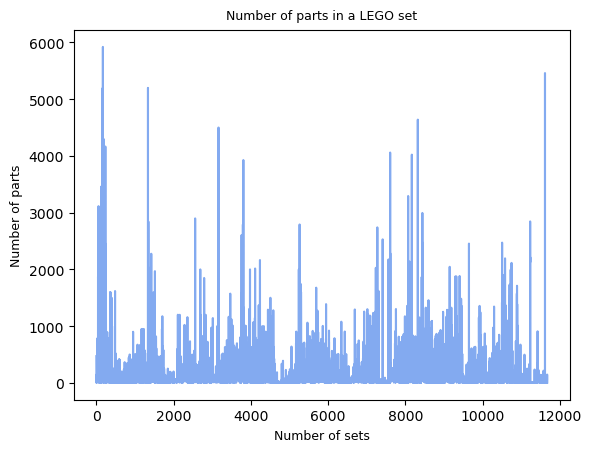

In [33]:
plt.plot(num_sets_parts, color = "cornflowerblue", alpha = 0.8)
plt.title("Number of parts in a LEGO set", fontsize = "9", pad = "8")
plt.xlabel("Number of sets", fontsize = "9")
plt.ylabel("Number of parts", fontsize = "9")
plt.show()

You remember, we had the largest set with nearly 6000 parts, 5922, the Taj Mahal? But let's go back to the colors:

In [34]:
df_colors.name.unique().shape

(135,)

In [35]:
df_colors.shape

(135, 4)

In [36]:
df_colors.name.unique()[73]       # color on this position

'Blue-Violet'

There are 135 unique colors in this LEGO dataset.

In [37]:
all_blue = [df_colors["name"].str.contains("Blue")]

In [38]:
df_blue = pd.DataFrame(all_blue).T

In [39]:
df_blue.loc[df_blue["name"] == True]

name
2    True
10   True
23   True
32   True
37   True
39   True
47   True
56   True
69   True
73   True
85   True
87   True
97   True
101  True
103  True
108  True
120  True
129  True
132  True

In [40]:
df_colors.name[73]

'Blue-Violet'

In [41]:
df_colors.name[129]

'Glitter Trans-Light Blue'

There we are, found all the blue colors! We know the position, we display.

I will continue soon...

____________________________________________________________________________________________________________________________

Data source: https://www.kaggle.com/datasets/rtatman/lego-database